In [1]:
from qiskit import QuantumRegister, transpile
from mcx import McxVchainDirty, LinearMcx
#from mcxog import McxVchainOG

In [80]:
from qiskit import QuantumCircuit
import numpy as np
from qiskit.quantum_info import Operator
from qclib.util import get_cnot_count
#import matplotlib.pyplot as mpl

In [86]:
 # mcx_v_chain_circuit
num_controls = 7
num_target_qubit = 2
mcx_v_chain_circuit = McxVchainDirty(num_controls, num_target_qubit=num_target_qubit).definition

# qiskit_circuit
qiskit_circuit = QuantumCircuit(9)
controls = list(np.arange(4))
for t in range(6,9):
    qiskit_circuit.mcx(controls, [t])

mcx_v_chain_op = Operator(mcx_v_chain_circuit).data
qiskit_mcx_op = Operator(qiskit_circuit).data

# tr_mcx_v_chain = transpile(mcx_v_chain_circuit, basis_gates=['u', 'cx'])
# tr_qiskit_mcx = transpile(qiskit_circuit, basis_gates=['u', 'cx'])
# print(np.allclose(mcx_v_chain_op, qiskit_mcx_op))
# print("a implementaçao do qiskit usa", tr_qiskit_mcx.count_ops()['cx'], "CNOTs")
# print("nossa implementação usa", tr_mcx_v_chain.count_ops()['cx'], "CNOTs")

print("nossa implementação usa", get_cnot_count(mcx_v_chain_circuit), "CNOTs")
print("a implementaçao do qiskit usa", get_cnot_count(qiskit_circuit), "CNOTs")
if num_controls > 3:
    print( 10 + (num_controls - 2) * 8 + (num_target_qubit - 1) * 12 == get_cnot_count(mcx_v_chain_circuit))



nossa implementação usa 62 CNOTs
a implementaçao do qiskit usa 108 CNOTs
True


In [40]:
def tfl_count(k):
    toffoli = 4*(k-2)
    return toffoli

def cnot_count(k, target = 1):
    toffoli = tfl_count(k)
    cnot = 3*(toffoli-2) + 12 * target
    return cnot


print(cnot_count(5))

42


In [12]:
range(4,7)

range(4, 7)

Teste para n_controls<3

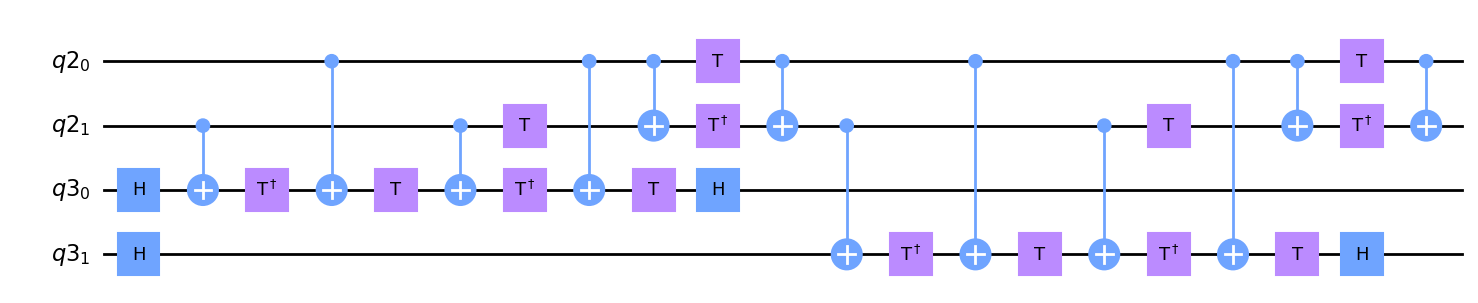

In [2]:
num_controls = 2
#num_ancilla = num_controls - 2
num_target_qubit = 2
control_qubits = QuantumRegister(num_controls)
target_qubit = QuantumRegister(num_target_qubit)

mcx_v_chain = McxVchainDirty(num_controls, num_target_qubit=num_target_qubit).definition

#tr_mcx_v_chain = transpile(mcx_v_chain, basis_gates=['u', 'cx'])
mcx_v_chain.decompose().draw('mpl')

n_controls=3

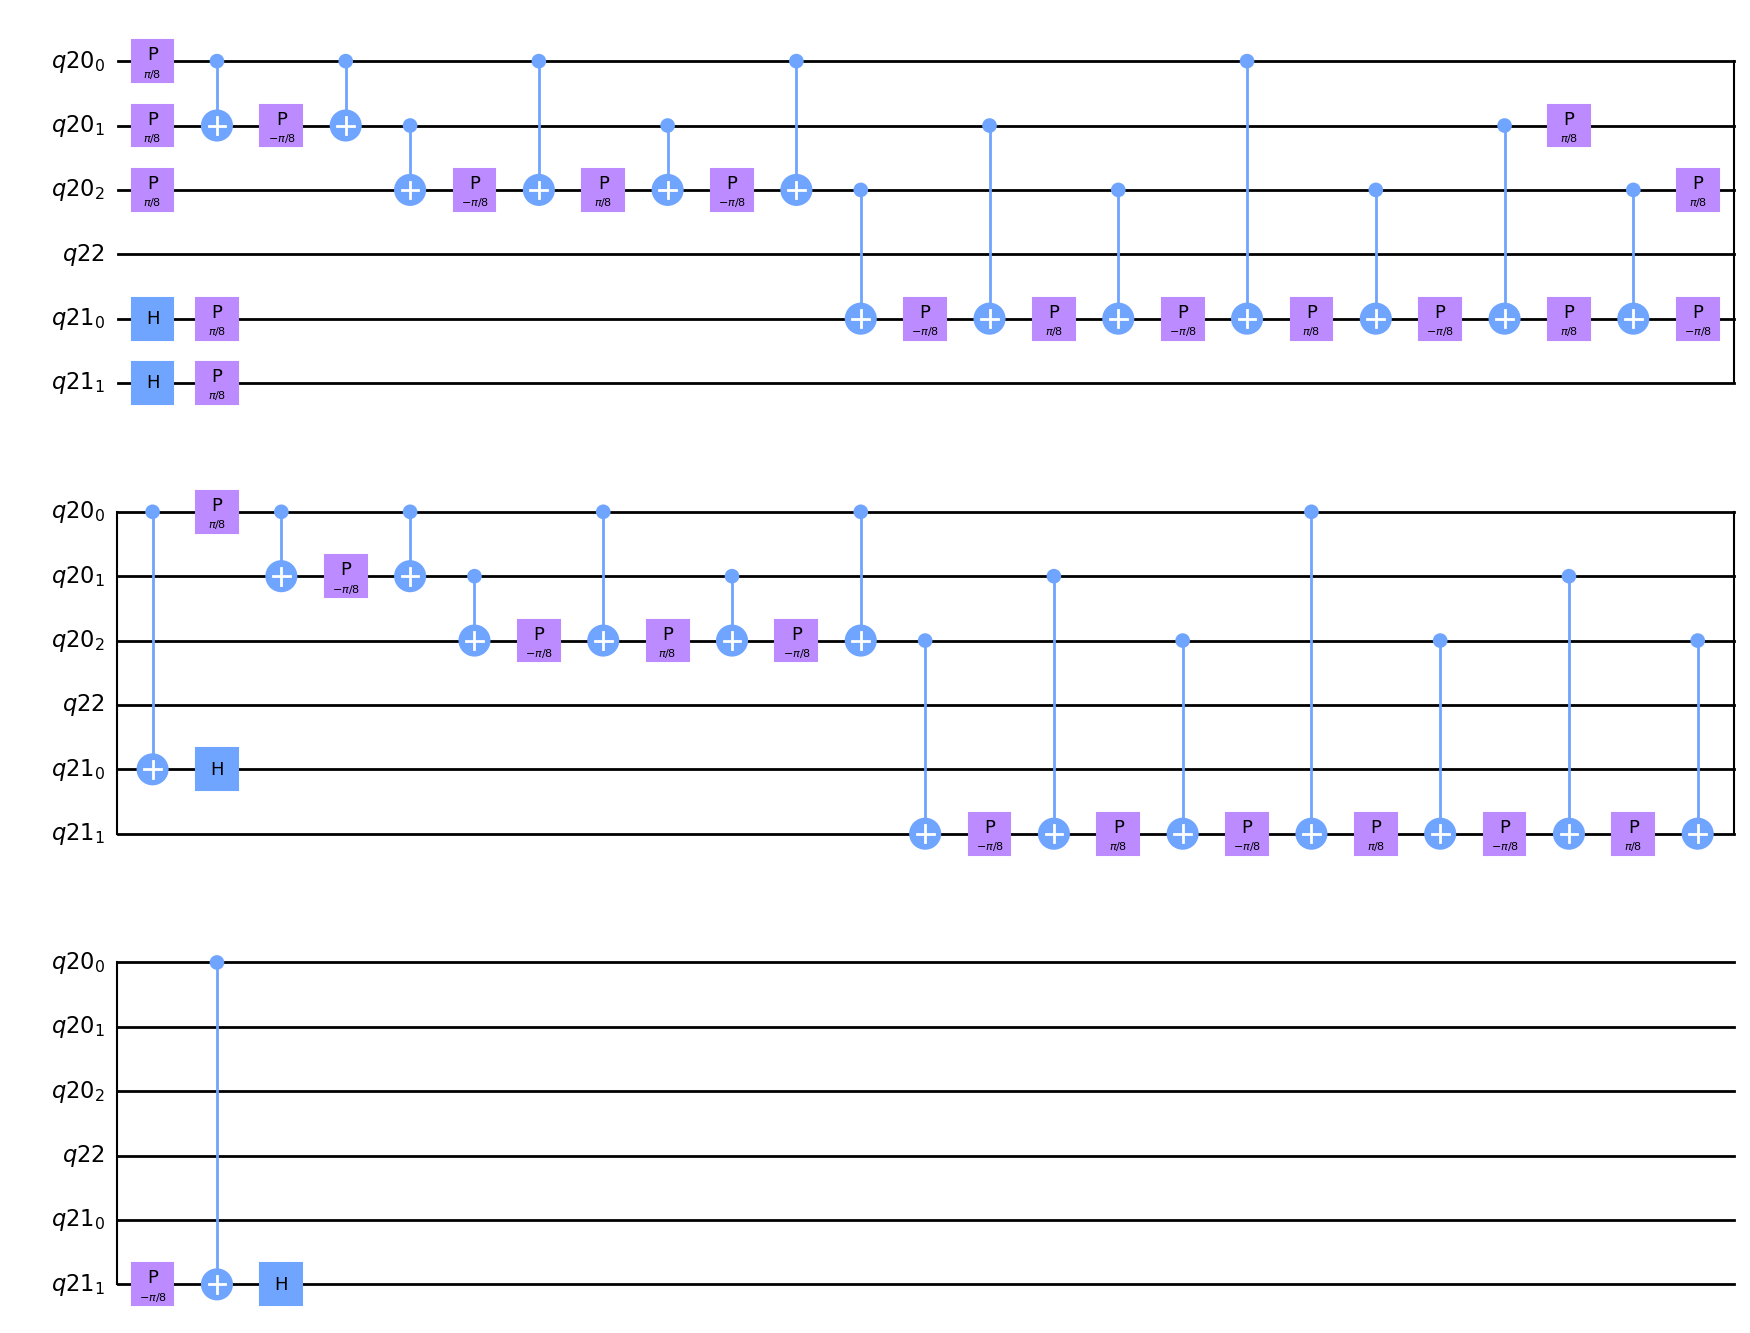

In [8]:
num_controls = 3
#num_ancilla = num_controls - 2
num_target_qubit = 2
control_qubits = QuantumRegister(num_controls)
target_qubit = QuantumRegister(num_target_qubit)

mcx_v_chain = McxVchainDirty(num_controls, num_target_qubit=num_target_qubit).definition

#tr_mcx_v_chain = transpile(mcx_v_chain, basis_gates=['u', 'cx'])
mcx_v_chain.decompose().draw('mpl')

Para n_controls = 4

Para apenas um target, usando a função original

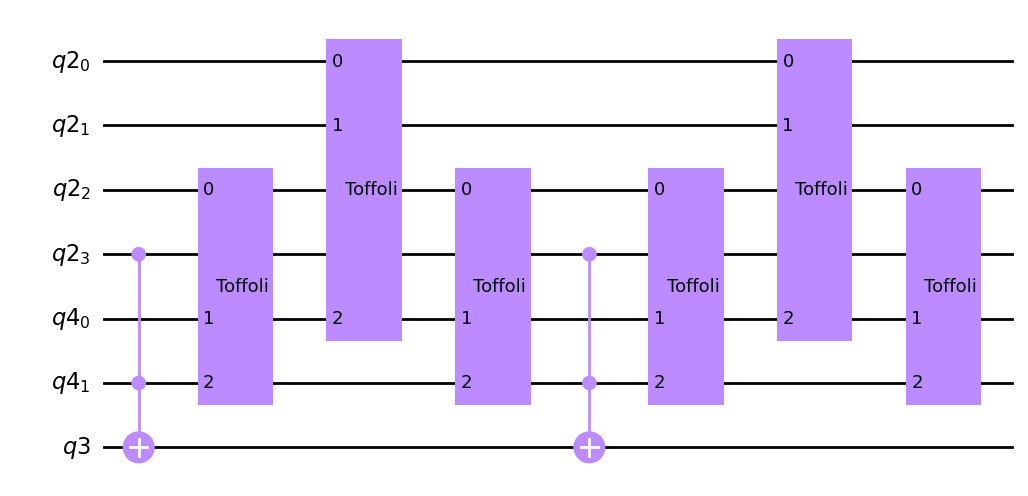

In [2]:
num_controls = 4
#num_ancilla = num_controls - 2
num_target_qubit = 1
control_qubits = QuantumRegister(num_controls)
target_qubit = QuantumRegister(num_target_qubit)

mcx_v_chain = McxVchainOG(num_controls).definition

#tr_mcx_v_chain = transpile(mcx_v_chain, basis_gates=['u', 'cx'])
mcx_v_chain.draw('mpl')

Para um target usando nossa funçao

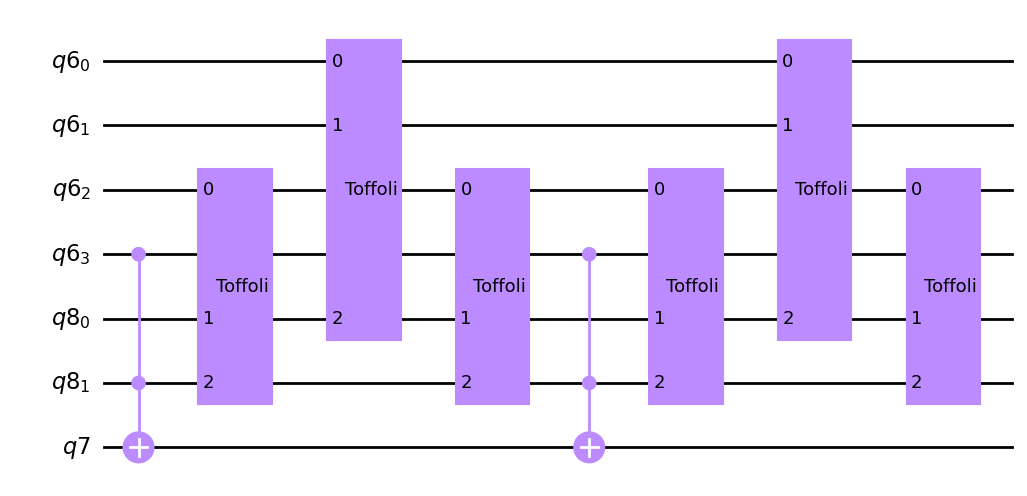

In [3]:
num_controls = 4
#num_ancilla = num_controls - 2
num_target_qubit = 1
control_qubits = QuantumRegister(num_controls)
target_qubit = QuantumRegister(num_target_qubit)

mcx_v_chain = McxVchainDirty(num_controls).definition

#tr_mcx_v_chain = transpile(mcx_v_chain, basis_gates=['u', 'cx'])
mcx_v_chain.draw('mpl')

Para 2 targets

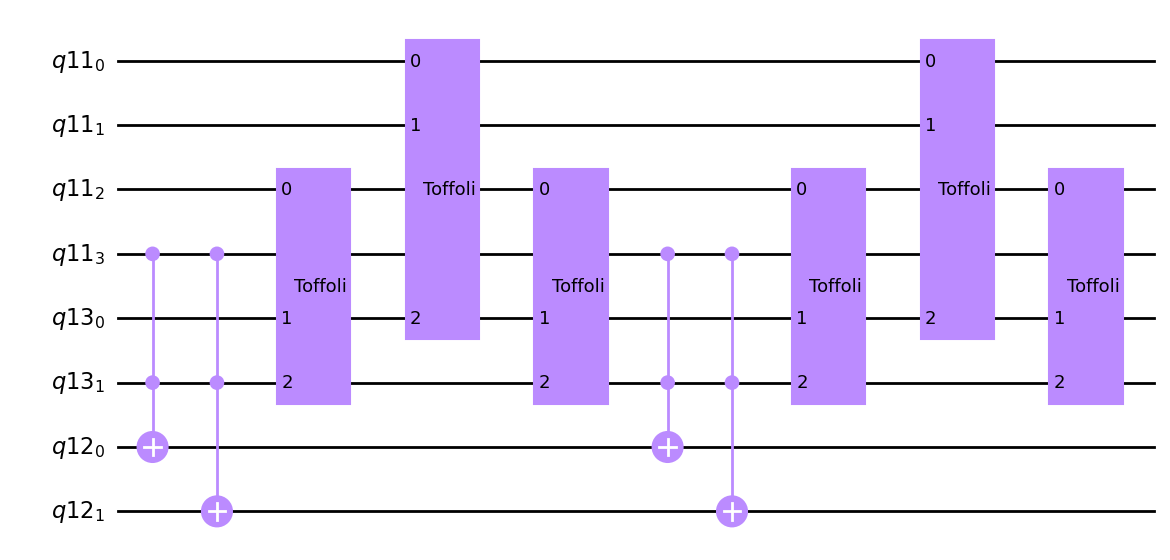

In [4]:
num_controls = 4
#num_ancilla = num_controls - 2
num_target_qubit = 2
control_qubits = QuantumRegister(num_controls)
target_qubit = QuantumRegister(num_target_qubit)

mcx_v_chain = McxVchainDirty(num_controls, num_target_qubit=num_target_qubit).definition

#tr_mcx_v_chain = transpile(mcx_v_chain, basis_gates=['u', 'cx'])
mcx_v_chain.draw('mpl')